# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import seaborn as sns


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive_enhanced_data = pd.read_csv('./twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# image_predictions_data.head()
import requests
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response= requests.get(url)

In [4]:
with open('image-predictions.tsv','w') as file:
    file.write(response.text)


In [5]:
image_predictions_data= pd.read_csv('image-predictions.tsv',sep='\t')


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive_data.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [8]:
data_api= [json.loads(line)
        for line in open('tweet-json.txt', 'r', encoding='utf-8')]

In [9]:
api_data= pd.DataFrame(data_api)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [10]:
twitter_archive_enhanced_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
twitter_archive_enhanced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

* Drop unnecessary columns that contain null: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls

* Untidy issue: doggo, floofer, pupper and puppo are in seperate columns 
* Dirty issue: doggo, floofer, pupper and puppo contain None instead of null values and are counted as non-null
* Dirty issue: null values in expanded_urls

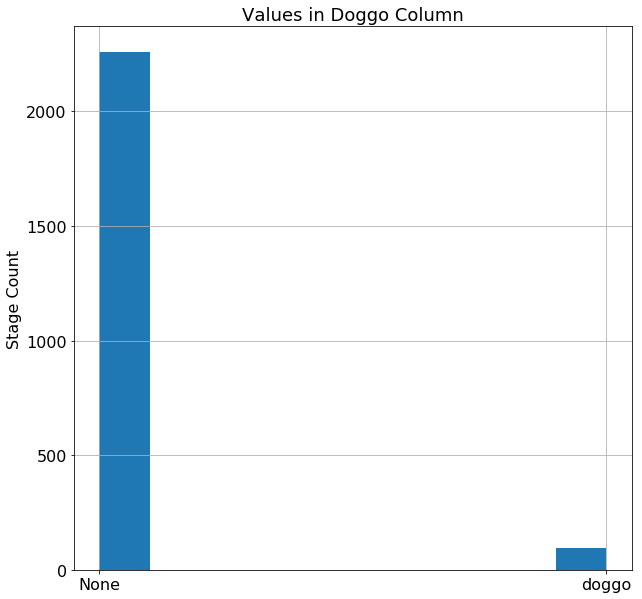

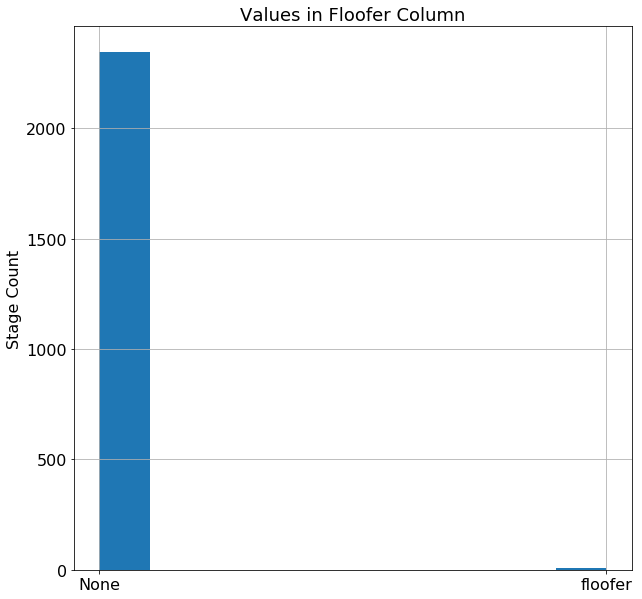

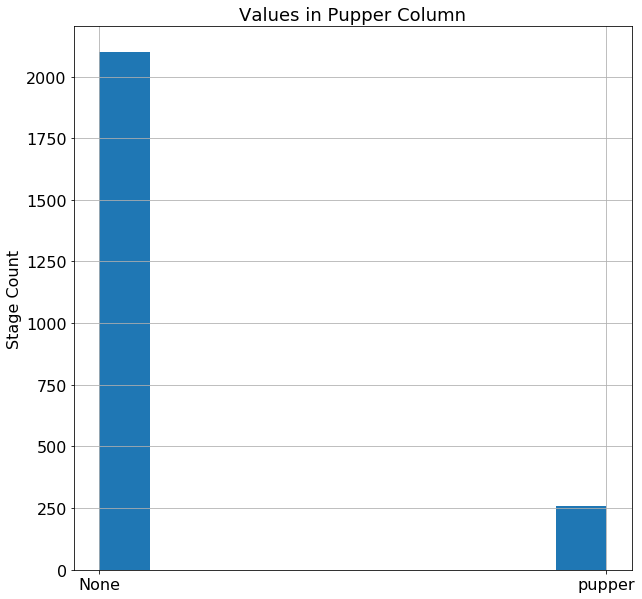

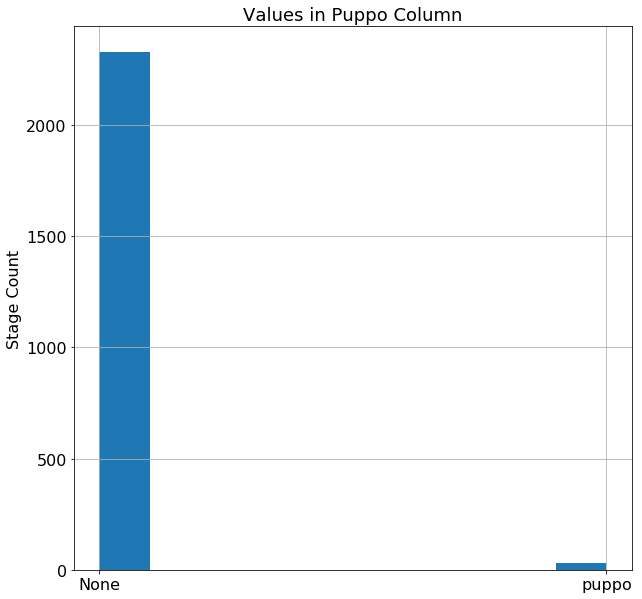

In [12]:
for col in ['doggo','floofer','pupper','puppo']:
    plt.figure(figsize=(10,10))
    twitter_archive_enhanced_data[col].hist()
    
    plt.ylabel('Stage Count', size=16)
    plt.title('Values in {} Column'.format(col.capitalize()), size=18)
    plt.xticks(size=16)
    plt.yticks(size=16)
    plt.show()

In [13]:
twitter_archive_enhanced_data['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [14]:
twitter_archive_enhanced_data.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [15]:
twitter_archive_enhanced_data.duplicated().sum()

0

In [16]:
twitter_archive_enhanced_data['rating_denominator'].unique()


array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

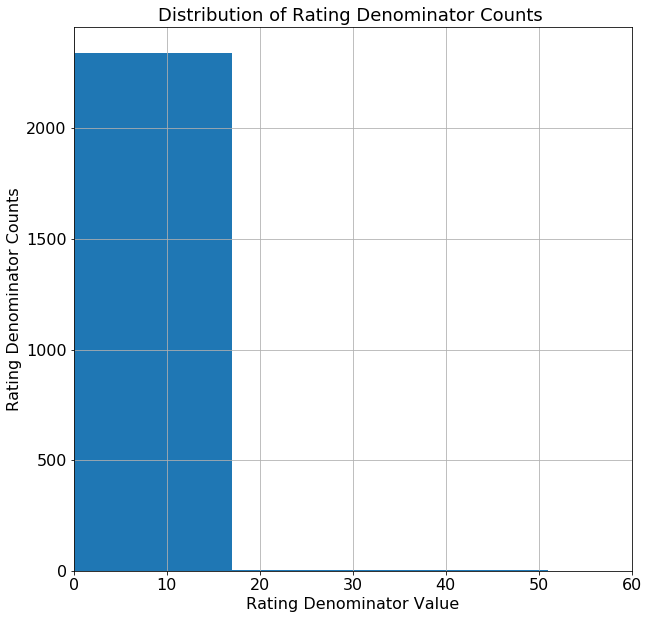

In [17]:
plt.figure(figsize=(10,10))
twitter_archive_enhanced_data['rating_denominator'].hist()
plt.xlim(0,60)
plt.ylabel('Rating Denominator Counts', size=16)
plt.xlabel('Rating Denominator Value', size=16)
plt.title('Distribution of Rating Denominator Counts ', size=18)
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()

In [18]:
twitter_archive_enhanced_data['rating_denominator'].value_counts().to_frame()


,rating_denominator
10,2333
11,3
50,3
80,2
20,2
2,1
16,1
40,1
70,1
15,1


In [19]:
twitter_archive_enhanced_data['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

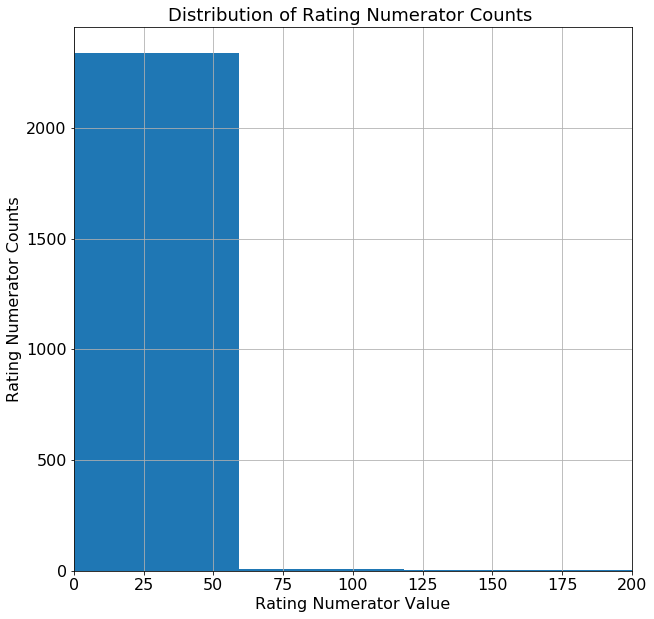

In [20]:
plt.figure(figsize=(10,10))
twitter_archive_enhanced_data['rating_numerator'].hist(bins=30)
plt.xlim(0,200)
plt.ylabel('Rating Numerator Counts', size=16)
plt.xlabel('Rating Numerator Value', size=16)
plt.title('Distribution of Rating Numerator Counts ', size=18)
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()

In [21]:
twitter_archive_enhanced_data['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [22]:
sorted(twitter_archive_enhanced_data.name.unique())

['Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Balto',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Barry',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',


all names start with capital values, the last 25 values are not names.

In [23]:
image_predictions_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [24]:
image_predictions_data.duplicated().sum()

0

In [25]:
image_predictions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
api_data.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [27]:
api_data['favorited'].value_counts()

False    2346
True        8
Name: favorited, dtype: int64

In [28]:
api_data[api_data['favorite_count']==0]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
31,None,None,Sat Jul 15 02:45:48 +0000 2017,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,0,False,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,None,...,False,NaN,8.860534e+17,886053434075471873,108,False,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
35,None,None,Thu Jul 13 01:35:06 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830583314243268608, 'id_str'...",0,False,RT @dog_rates: This is Lilly. She just paralle...,None,...,False,NaN,NaN,NaN,19297,False,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
67,None,None,Mon Jun 26 00:13:58 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Emmy. She was adopted t...,None,...,NaN,NaN,NaN,NaN,7181,False,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
72,None,None,Sat Jun 24 00:09:53 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: Meet Shadow. In an attempt to r...,None,...,NaN,NaN,NaN,NaN,1349,False,{'created_at': 'Fri Jun 23 16:00:04 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
73,None,None,Fri Jun 23 18:17:33 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: Meet Terrance. He's being yelle...,None,...,NaN,NaN,NaN,NaN,6965,False,{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
77,None,None,Wed Jun 21 19:36:23 +0000 2017,"[0, 122]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 876850756556607488, 'id_str'...",0,False,RT @rachel2195: @dog_rates the boyfriend and h...,None,...,False,NaN,NaN,NaN,83,False,{'created_at': 'Mon Jun 19 17:14:49 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
90,None,None,Tue Jun 13 01:14:41 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Coco. At first I though...,None,...,NaN,NaN,NaN,NaN,15546,False,{'created_at': 'Sun May 21 16:48:45 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
94,None,None,Sun Jun 11 00:25:14 +0000 2017,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 868880391209275392, 'id_str'...",0,False,RT @dog_rates: This is Walter. He won't start ...,None,...,False,NaN,NaN,NaN,12518,False,{'created_at': 'Sun May 28 17:23:24 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
96,None,None,Sat Jun 10 00:35:19 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Sierra. She's one preci...,None,...,NaN,NaN,NaN,NaN,1667,False,{'created_at': 'Fri Jun 09 16:22:42 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
100,None,None,Thu Jun 08 04:17:07 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @loganamnosis: Penelope here is doing me qu...,None,...,NaN,NaN,NaN,NaN,31,False,{'created_at': 'Thu Jun 08 03:32:35 +0000 2017.

In [29]:
api_data['entities'][0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [30]:
api_data['extended_entities'][0]

{'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [31]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

* Tidy issue: Nested jsons
* Tidy issue: tweet retweeting info being redundant and separated
* Null in extended entities
* Mainly nulls columns

In [32]:
api_data.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [33]:
api_data.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

In [34]:
api_data[['lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user']].head()

,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,en,None,False,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,en,None,False,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,en,None,False,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,en,None,False,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,en,None,False,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [35]:
api_data[['geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status']].head()

,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status
0,None,892420643555336193,892420643555336193,None,NaN,None,NaN,None,False
1,None,892177421306343426,892177421306343426,None,NaN,None,NaN,None,False
2,None,891815181378084864,891815181378084864,None,NaN,None,NaN,None,False
3,None,891689557279858688,891689557279858688,None,NaN,None,NaN,None,False
4,None,891327558926688256,891327558926688256,None,NaN,None,NaN,None,False


In [36]:
api_data['is_quote_status'].value_counts()

False    2323
True       31
Name: is_quote_status, dtype: int64

In [37]:
api_data.lang.unique()

array(['en', 'und', 'in', 'eu', 'es', 'nl', 'tl', 'ro', 'et'], dtype=object)

### Quality issues
#### twitter_archive_enhanced_data:

1. columns that contain null: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls.


2. doggo, floofer, pupper and puppo columns contain None which is defined as an object data type instead of being counted as null type.

3. rating_denominator contains 0 
4. tweet_id is integer
5. name column: for the unique sorted values in this column, all names start with capital values, the last 25 values are not names.

6. source contains data as an html tag
#### image_predictions_data


7. 'p1', 'p2', 'p3' have inconsistency formatting issues in breeds name some are capitalized, some are hyphenated and others are not.

#### api_data

8. 'contributors', 'coordinates', 'geo', 'in_reply_to_screen_name',   'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status' contain null values

9. created_at is not a time stamp and condensed in a single column

### Tidiness issues
1. twitter_archive_enhanced_data has the categories doggo, floofer, pupper and puppo in separate columns although they represent the same feature.

2. api_data has columns that contain dictionaries which could be separated into their own columns: entities, extended_entities, user
3. display_text_range contains a list that has two values
4. image_predictions_data should be in the same table as twitter_archive_enhanced_data instead of a separate table


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [38]:
# Make copies of original pieces of data
archive_enhanced_copy = twitter_archive_enhanced_data.copy()
img_pred_copy = image_predictions_data.copy()
api_copy = api_data.copy()

### Quality Issue #1: 

#### Define: 

twitter_archive_enhanced_data,  columns that contain null: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls.

#### Code

In [39]:
archive_enhanced_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

Before dropping the columns for retweeted_status_id, we need to drop the rows for retweets first

In [40]:
idx_=archive_enhanced_copy[archive_enhanced_copy.retweeted_status_timestamp.isnull() ==False].index
archive_enhanced_copy.drop(idx_, axis=0, inplace=True)

In [41]:
#test correct dropping of rows
archive_enhanced_copy[archive_enhanced_copy['retweeted_status_id'].isnull()==False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [42]:
#drop columns that have null values
archive_enhanced_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls'], axis=1, inplace=True)

#### Test

In [43]:
archive_enhanced_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [44]:
archive_enhanced_copy.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


In [45]:
archive_enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


### Tidiness Issue #1 & Quality Issue #2:

#### Define:

 the categories doggo, floofer, pupper and puppo are in seperate columns although they represent the same feature.
 
doggo, floofer, pupper and puppo columns contain None which is defined as an object data type instead of being counted as null type causing issues when using merging columns 

#### Code

Some records have 2 values for the stage, so we need to replace None with nan

In [46]:
archive_enhanced_copy[['doggo', 'floofer', 'pupper', 'puppo']] = archive_enhanced_copy[['doggo', 'floofer', 'pupper', 'puppo']].apply( lambda x: x.replace( 'None', np.nan) )

In [47]:
#melt the doggo, floofer, pupper and puppo columns
melt_ = pd.melt(archive_enhanced_copy, id_vars=[ 'tweet_id'], value_vars=['doggo', 'floofer', 'pupper', 'puppo']).dropna(subset=['value'])

In [48]:
melt_ = melt_.groupby(['tweet_id'])['value'].apply(lambda x: ','.join(x)).reset_index()

In [49]:
archive_enhanced_copy.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'],inplace=True)

In [50]:
archive_enhanced_copy= archive_enhanced_copy.merge(melt_, how='left',on= 'tweet_id')

In [51]:
archive_enhanced_copy.rename(columns = {'value':'stage'}, inplace = True)

#### Test

In [52]:
archive_enhanced_copy.stage.value_counts(dropna=False)

NaN              1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

Now, we refill nan with None after fixing the having more than a value issue.

In [53]:
archive_enhanced_copy['stage'].fillna('None',inplace=True)
archive_enhanced_copy.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None


In [54]:
archive_enhanced_copy.stage.value_counts()

None             1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

### Quality Issue #3:

#### Define

rating_denominator contains 0

#### Code

In [55]:
idx2_ = archive_enhanced_copy[archive_enhanced_copy['rating_denominator']==0].index
archive_enhanced_copy.drop(idx2_, inplace= True)

#### Test

In [56]:
(archive_enhanced_copy['rating_denominator']==0).sum()

0

### Quality Issue #4:

#### Define

tweet_id is integer

#### Code

In [57]:
archive_enhanced_copy['tweet_id'] = archive_enhanced_copy['tweet_id'].astype('str');

#### Test

In [58]:
archive_enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2174
Data columns (total 8 columns):
tweet_id              2174 non-null object
timestamp             2174 non-null object
source                2174 non-null object
text                  2174 non-null object
rating_numerator      2174 non-null int64
rating_denominator    2174 non-null int64
name                  2174 non-null object
stage                 2174 non-null object
dtypes: int64(2), object(6)
memory usage: 152.9+ KB


### Quality Issue #5:

#### Define

name column: for the unique sorted values in this columns, all names start with capital values, the last 25 values are not names.

#### Code

In [59]:
error_names = sorted(archive_enhanced_copy.name.unique())[-25:]
error_names

['a',
 'actually',
 'all',
 'an',
 'by',
 'getting',
 'his',
 'incredibly',
 'infuriating',
 'just',
 'life',
 'light',
 'mad',
 'my',
 'not',
 'officially',
 'old',
 'one',
 'quite',
 'space',
 'such',
 'the',
 'this',
 'unacceptable',
 'very']

In [60]:
archive_enhanced_copy['name'] = archive_enhanced_copy['name'].apply(lambda x: np.nan if x in error_names else x)

In [61]:
archive_enhanced_copy.dropna(subset=['name'], inplace=True)

#### Test

In [62]:
sorted(archive_enhanced_copy.name.unique())[-25:]

['Wesley',
 'Wiggles',
 'Willem',
 'William',
 'Willie',
 'Willow',
 'Willy',
 'Wilson',
 'Winifred',
 'Winnie',
 'Winston',
 'Wishes',
 'Wyatt',
 'Yoda',
 'Yogi',
 'Yukon',
 'Zara',
 'Zeek',
 'Zeke',
 'Zeus',
 'Ziva',
 'Zoe',
 'Zoey',
 'Zooey',
 'Zuzu']

### Quality Issue #6:

#### Define

source contains data as an html tag

#### Code

In [63]:
archive_enhanced_copy.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1946
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          87
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       27
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [64]:
archive_enhanced_copy['source']=archive_enhanced_copy['source'].apply(lambda x: x.split('>')[1].split('<')[0])

#### Test

In [65]:
archive_enhanced_copy['source'].value_counts()

Twitter for iPhone     1946
Vine - Make a Scene      87
Twitter Web Client       27
TweetDeck                10
Name: source, dtype: int64

### Quality Issue #7:

#### Define

'p1', 'p2', 'p3' have inconsistency formatting issues in breeds name some are capitalized, some are hyphened and others are not.

#### Code

In [66]:

for col in ['p1', 'p2', 'p3']:
    
    img_pred_copy[col] = img_pred_copy[col].apply(lambda x: x.replace('_','').lower())
    


#### Test

In [67]:
img_pred_copy[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,welshspringerspaniel,collie,shetlandsheepdog
1,redbone,miniaturepinscher,rhodesianridgeback
2,germanshepherd,malinois,bloodhound
3,rhodesianridgeback,redbone,miniaturepinscher
4,miniaturepinscher,rottweiler,doberman


### Quality Issue #8:

#### Define

'contributors', 'coordinates', 'geo', 'in_reply_to_screen_name',   'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status'

#### Code

In [68]:
api_copy.drop(columns=['contributors', 'coordinates', 'geo', 'in_reply_to_screen_name',   'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status'],inplace=True)

#### Test

In [69]:
api_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 24 columns):
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
lang                             2354 non-null object
place                            1 non-null object
possibly_sensitive               2211 non-null object
possibly_sensitive_appealable    2211 non-null object
quoted_status                    28 non-null object
quoted_status_id                 29 non-n

### Quality Issue #9:

#### Define

tweet_id is a string data type

#### Code

In [70]:
img_pred_copy['tweet_id'] = img_pred_copy['tweet_id'].astype('str');

#### Test

In [71]:
img_pred_copy.tweet_id.dtype

dtype('O')

### Quality Issue #10:

#### Define

created_at is not a time stamp and condensed in a single column

#### Code

In [72]:
new_cols = ['day_of_week','month','day','hr','extra','year']
for col in new_cols:
    api_copy[col]= ''
api_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 30 columns):
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
lang                             2354 non-null object
place                            1 non-null object
possibly_sensitive               2211 non-null object
possibly_sensitive_appealable    2211 non-null object
quoted_status                    28 non-null object
quoted_status_id                 29 non-n

In [73]:
api_copy['created_at'].str.split()[0]

['Tue', 'Aug', '01', '16:23:56', '+0000', '2017']

In [74]:
for i in range(6):
    
    api_copy[new_cols[i]] = api_copy['created_at'].apply(lambda x: x.split()[i])
    if new_cols[i]=='hr':
        api_copy['hr']=api_copy['hr'].apply(lambda x: x.split(':')[0]).astype('int')

In [75]:
api_copy.hr.head()

0    16
1     0
2     0
3    15
4    16
Name: hr, dtype: int64

In [76]:
api_copy.drop('created_at',axis=1,inplace=True)

#### Test

In [77]:
api_copy.head()

,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,...,retweeted_status,source,truncated,user,day_of_week,month,day,hr,extra,year
0,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,892420643555336193,NaN,None,...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",Tue,Aug,01,16,+0000,2017
1,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,892177421306343426,892177421306343426,NaN,None,...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",Tue,Aug,01,0,+0000,2017
2,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,891815181378084864,NaN,None,...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",Mon,Jul,31,0,+0000,2017
3,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,891689557279858688,891689557279858688,NaN,None,...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",Sun,Jul,30,15,+0000,2017
4,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,891327558926688256,891327558926688256,NaN,None,...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",Sat,Jul,29,16,+0000,2017


## Tidiness

### Tidiness Issue #2:

#### Define

api_data has columns that contain dictionaries which could be separated into their own columns: entities, extended_entities, user

#### Code

In [78]:
api_copy.drop(['user','entities','extended_entities'], axis=1, inplace = True)

#### Test

In [79]:
api_copy.columns

Index(['display_text_range', 'favorite_count', 'favorited', 'full_text', 'id',
       'id_str', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'lang',
       'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'day_of_week', 'month', 'day', 'hr', 'extra', 'year'],
      dtype='object')

### Tidiness Issue #3:

#### Define

display_text_range contains a list that has two values instead of a single value

#### Code

In [80]:
api_copy.display_text_range= api_copy.display_text_range.apply(lambda x : x[-1])

#### Test

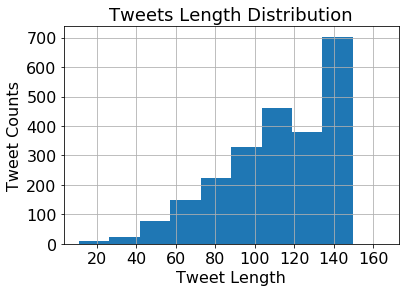

In [81]:
api_copy.display_text_range.hist()

plt.xlabel('Tweet Length', size=16)
plt.ylabel('Tweet Counts', size=16)
plt.title('Tweets Length Distribution', size=18)
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()

### Tidiness Issue #4:

#### Define


#### Code

In [82]:
df1=archive_enhanced_copy.merge(img_pred_copy,how='inner', on='tweet_id')
df1.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,papertowel,0.170278,False,labradorretriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,englishspringer,0.225770,True,germanshort-hairedpointer,0.175219,True


Some images are not of dogs when predicted, we will drop them

In [83]:
index_p_dog = df1[ (df1['p1_dog'] == False) | (df1['p2_dog'] == False) | (df1['p3_dog'] == False)].index

df1.drop(index_p_dog, inplace=True)

#### Test

In [84]:
df1.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,englishspringer,0.225770,True,germanshort-hairedpointer,0.175219,True
7,890729181411237888,2017-07-28 00:22:40 +0000,Twitter for iPhone,When you watch your owner call another dog a g...,13,10,None,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,pomeranian,0.566142,True,eskimodog,0.178406,True,pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51 +0000,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,irishterrier,0.487574,True,irishsetter,0.193054,True,chesapeakebayretriever,0.118184,True


#### Final Dataframe

In [85]:
df2 = df1.merge(api_copy, how='inner', left_on= 'tweet_id', right_on='id_str')

In [86]:
df2.drop(columns=['extra','truncated', 'source_y','source_x'], axis=1, inplace=True)

In [87]:
df2.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,...,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,day_of_week,month,day,hr,year
0,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,...,NaN,NaN,6514,False,NaN,Tue,Aug,01,0,2017
1,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,...,NaN,NaN,4328,False,NaN,Mon,Jul,31,0,2017
2,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,...,NaN,NaN,9774,False,NaN,Sat,Jul,29,16,2017
3,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,13,10,None,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,pomeranian,...,NaN,NaN,16716,False,NaN,Fri,Jul,28,0,2017
4,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,irishterrier,...,NaN,NaN,4429,False,NaN,Thu,Jul,27,16,2017


In [88]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1148 entries, 0 to 1147
Data columns (total 41 columns):
tweet_id                         1148 non-null object
timestamp                        1148 non-null object
text                             1148 non-null object
rating_numerator                 1148 non-null int64
rating_denominator               1148 non-null int64
name                             1148 non-null object
stage                            1148 non-null object
jpg_url                          1148 non-null object
img_num                          1148 non-null int64
p1                               1148 non-null object
p1_conf                          1148 non-null float64
p1_dog                           1148 non-null bool
p2                               1148 non-null object
p2_conf                          1148 non-null float64
p2_dog                           1148 non-null bool
p3                               1148 non-null object
p3_conf                          1

In [89]:
(df2.text==df2.full_text).sum()

1148

In [90]:
(df2.id_str==df2.tweet_id).sum()

1148

In [91]:
df2.retweeted.sum()

0

In [92]:
df2.favorited.sum()

3

Now, we drop the timestamp , id, id_str, in_reply_to_status_id, in_reply_to_status_id_str, place, possibly_sensitive, full_text, possibly_sensitive_appealable, quoted_status, quoted_status_id, quoted_status_id_str, retweeted_status 

In [93]:
df2.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'display_text_range', 'favorite_count', 'favorited',
       'full_text', 'id', 'id_str', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'lang', 'place', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'quoted_status', 'quoted_status_id',
       'quoted_status_id_str', 'retweet_count', 'retweeted',
       'retweeted_status', 'day_of_week', 'month', 'day', 'hr', 'year'],
      dtype='object')

In [94]:
df2.drop(columns=['timestamp', 'id', 'id_str', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'place', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'quoted_status', 'quoted_status_id',
       'quoted_status_id_str','retweeted_status','retweeted','full_text', 'favorited' ], axis=1, inplace= True)

In [95]:
df2.head().T

,0,1,2,3,4
tweet_id,892177421306343426,891815181378084864,891327558926688256,890729181411237888,890609185150312448
text,This is Tilly. She's just checking pup on you....,This is Archie. He is a rare Norwegian Pouncin...,This is Franklin. He would like you to stop ca...,When you watch your owner call another dog a g...,This is Zoey. She doesn't want to be one of th...
rating_numerator,13,12,12,13,13
rating_denominator,10,10,10,10,10
name,Tilly,Archie,Franklin,None,Zoey
stage,None,None,None,None,None
jpg_url,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg
img_num,1,1,2,2,1
p1,chihuahua,chihuahua,basset,pomeranian,irishterrier
p1_conf,0.323581,0.716012,0.555712,0.566142,0.487574


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [96]:
df2.to_csv('twitter_archive_master.csv', index=False)

#### Test

In [97]:
pd.read_csv('twitter_archive_master.csv').head()

,tweet_id,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,...,p3_dog,display_text_range,favorite_count,lang,retweet_count,day_of_week,month,day,hr,year
0,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,...,True,138,33819,en,6514,Tue,Aug,1,0,2017
1,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,...,True,121,25461,en,4328,Mon,Jul,31,0,2017
2,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,...,True,138,41048,en,9774,Sat,Jul,29,16,2017
3,890729181411237888,When you watch your owner call another dog a g...,13,10,None,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,pomeranian,0.566142,...,True,118,56848,en,16716,Fri,Jul,28,0,2017
4,890609185150312448,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,irishterrier,0.487574,...,True,122,28226,en,4429,Thu,Jul,27,16,2017


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

## Insight #1

#### Tweets hourly distribution

Retweets peak at 12:00 am and 16:00 pm, from 7:00 am to 2:00 pm there are no retweets

In [98]:
df2.groupby('hr')['retweet_count'].sum().reset_index()

,hr,retweet_count
0,0,648884
1,1,345992
2,2,204120
3,3,145910
4,4,58647
5,5,10361
6,6,59236
7,14,7591
8,15,144086
9,16,473511


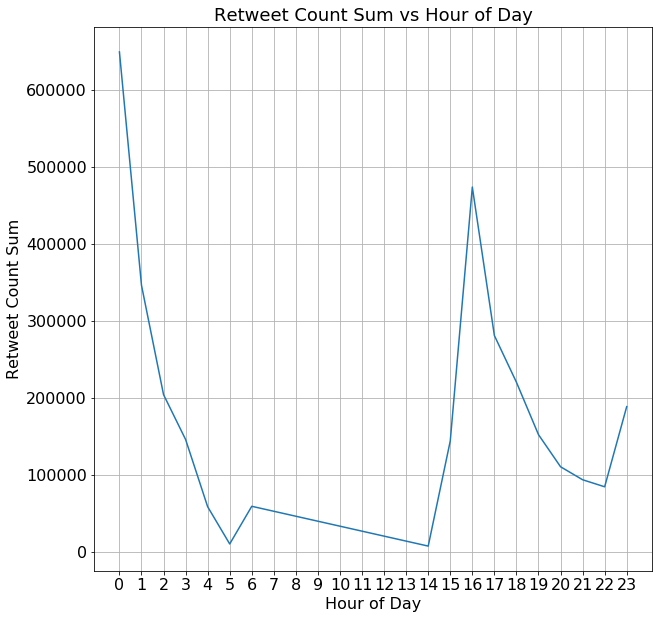

In [111]:
plt.figure(figsize=(10,10))
df2.groupby('hr')['retweet_count'].sum().plot();
plt.xticks(np.arange(min(df2['hr']), max(df2['hr'])+1, 1), size=16)
plt.xlabel('Hour of Day',size=16)
plt.ylabel('Retweet Count Sum', size=16)
plt.title('Retweet Count Sum vs Hour of Day'.format(col.capitalize()), size=18)
plt.yticks(size=16)
    
plt.grid()
plt.show()

We further investigate the trend of the plot above by plotting the average of retweet counts in 2016 for each hour in day

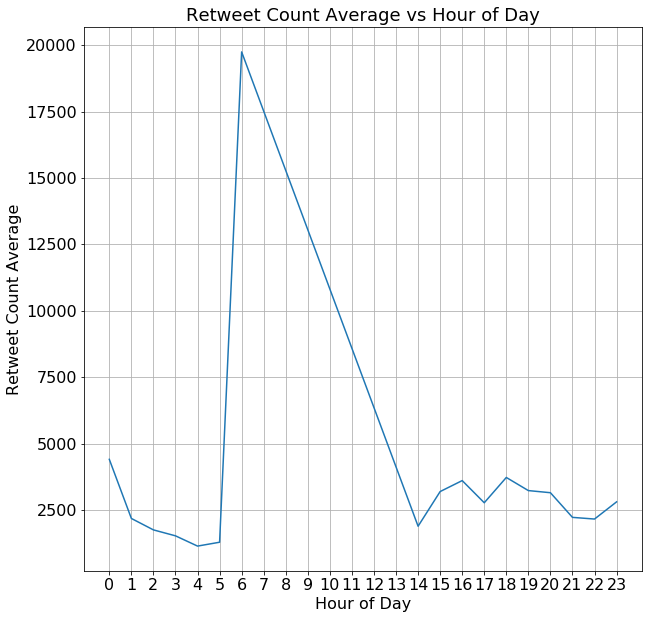

In [100]:
plt.figure(figsize=(10,10))
df2.groupby('hr')['retweet_count'].mean().plot();
plt.xticks(np.arange(min(df2['hr']), max(df2['hr'])+1, 1),size=16)

plt.xlabel('Hour of Day',size=16)
plt.ylabel('Retweet Count Average', size=16)
plt.title('Retweet Count Average vs Hour of Day'.format(col.capitalize()), size=18)
plt.yticks(size=16)
plt.grid()
plt.show()

The mean indicates that there are outliers, so we check the median.

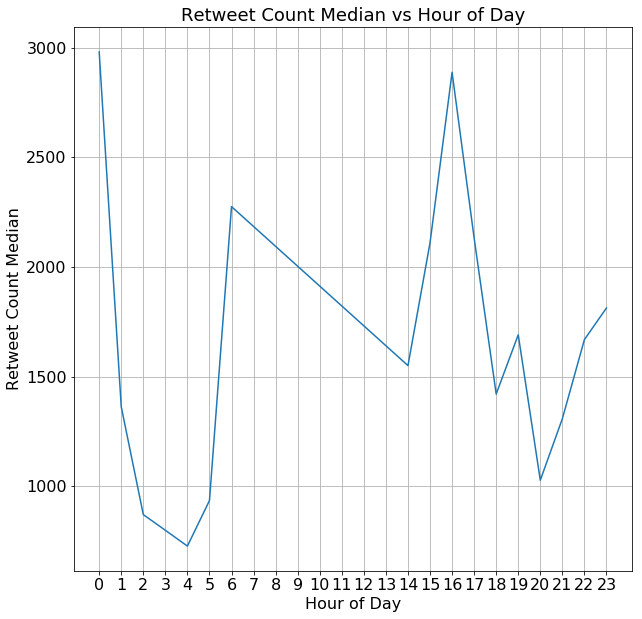

In [101]:
plt.figure(figsize=(10,10))
df2.groupby('hr')['retweet_count'].median().plot();
plt.xticks(np.arange(min(df2['hr']), max(df2['hr'])+1, 1), size=16)

plt.xlabel('Hour of Day',size=16)
plt.ylabel('Retweet Count Median', size=16)
plt.title('Retweet Count Median vs Hour of Day'.format(col.capitalize()), size=18)
plt.yticks(size=16)
plt.grid()
plt.show()

The median's trend is similar to that of the sum, however we need to see how points are distributed for each hour of the day so we use the scatter plot.

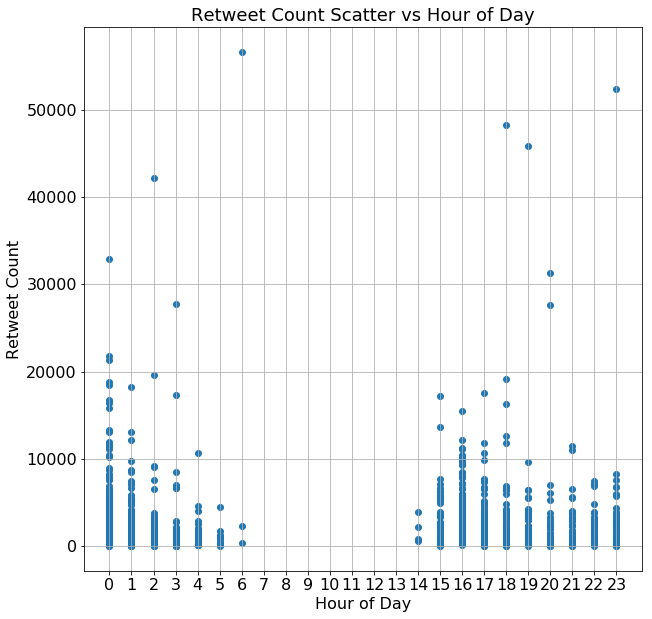

In [102]:
plt.figure(figsize=(10,10))
plt.scatter(df2['hr'],df2['retweet_count'])
plt.xticks(np.arange(min(df2['hr']), max(df2['hr'])+1, 1), size = 16)
plt.xlabel('Hour of Day',size=16)
plt.ylabel('Retweet Count', size=16)
plt.title('Retweet Count Scatter vs Hour of Day'.format(col.capitalize()), size=18)
plt.yticks(size=16)
plt.grid()
plt.show()

From 7:00 am to 13:00 pm, there are no retweets. We can also see the outliers at 6:00 AM that would justify the high value of the mean in the line plot above.

## Insight #2

#### Breed with largest number of retweets in  2016

Golden retriever had the largest number of tweets and largest sum of number of retweets



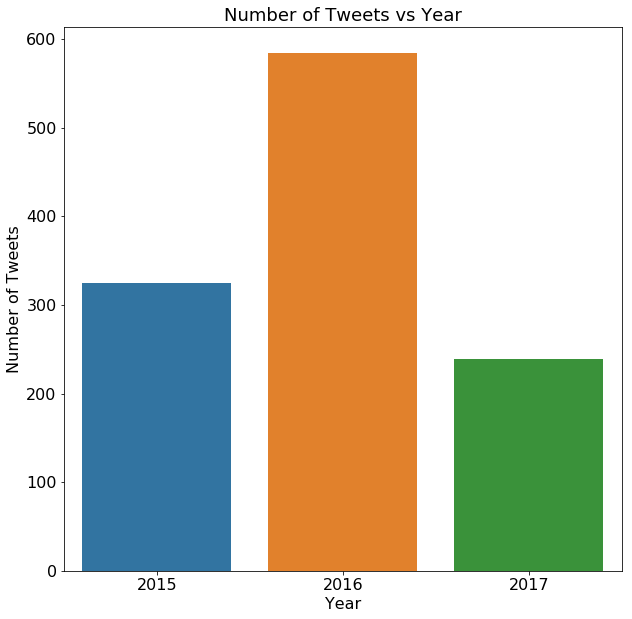

In [103]:
plt.figure(figsize=(10,10))
sns.countplot(x=df2["year"])
plt.xlabel('Year',size=16)
plt.ylabel('Number of Tweets', size=16)
plt.title('Number of Tweets vs Year'.format(col.capitalize()), size=18)
plt.yticks(size=16)
plt.xticks(size=16)
plt.show()

In [104]:
df2.groupby(['year','month'])['month'].count().to_frame()

month
year month       
2015 Dec      182
     Nov      143
2016 Apr       31
     Aug       35
     Dec       44
     Feb       64
     Jan       98
     Jul       48
     Jun       38
     Mar       76
     May       30
     Nov       37
     Oct       41
     Sep       42
2017 Apr       25
     Aug        1
     Feb       37
     Jan       49
     Jul       35
     Jun       33
     Mar       30
     May       29

Noticing that only in 2016 we have data for the 12 months of the year, we will exclude our analysis to data from 2016.

We will analyze the breeds that had the largest number of retweets in 2016

In [105]:
df2[df2['year']=='2016'].groupby('p1')['retweet_count'].sum().sort_values(ascending=False)[:10].reset_index().rename(columns = {'p1':'breed','retweet_count':'total_retweet_count'}, inplace=False)

,breed,total_retweet_count
0,goldenretriever,221653
1,pembroke,98058
2,chihuahua,93770
3,labradorretriever,92502
4,eskimodog,63462
5,samoyed,58935
6,malamute,41734
7,cockerspaniel,38498
8,chow,32982
9,miniaturepinscher,31892


In [106]:
top_10_breeds = df2[df2['year']=='2016']['p1'].value_counts().sort_values(ascending=False)[:10]

In [107]:
top_10_breeds.reset_index().rename(columns = {'index':'breed','p1':'number of tweets'}, inplace = False)


,breed,number of tweets
0,goldenretriever,66
1,pembroke,38
2,labradorretriever,34
3,chihuahua,20
4,pug,17
5,malamute,15
6,chow,15
7,toypoodle,14
8,cockerspaniel,14
9,samoyed,13


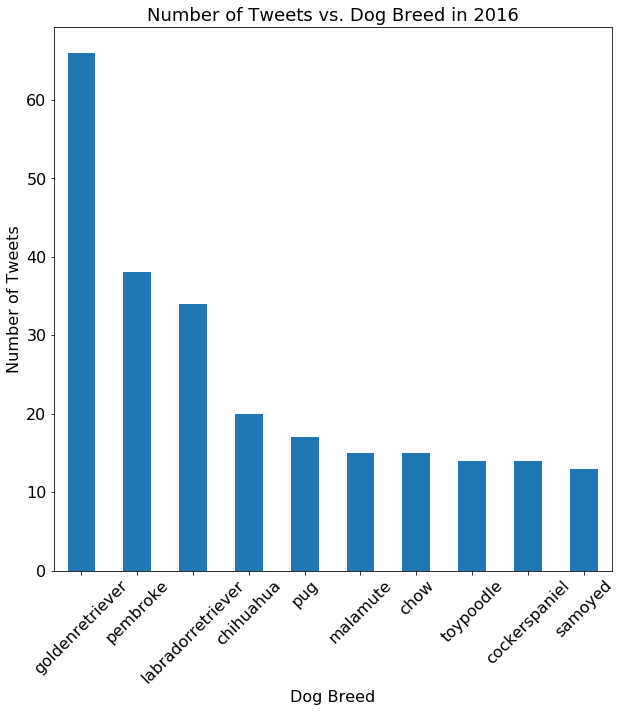

In [108]:
plt.figure(figsize=(10,10))
top_10_breeds.plot(kind='bar', color='#1f77b4')
plt.xlabel('Dog Breed',size=16)
plt.ylabel('Number of Tweets', size=16)
plt.title('Number of Tweets vs. Dog Breed in 2016'.format(col.capitalize()), size=18)
plt.yticks(size=16)
plt.xticks(rotation=45, size=16)
plt.show()

## Insight #3

##### Day of the week the has the largest sum of retweets in 2016 

Monday is the day of the week the has the largest sum of retweets in 2016  followed by Friday and Wednesday


In [109]:
df2[df2['year']=='2016'].groupby('day_of_week')['retweet_count'].sum().sort_values(ascending=False).reset_index()

,day_of_week,retweet_count
0,Mon,250439
1,Fri,240056
2,Wed,211173
3,Tue,196793
4,Sun,189200
5,Sat,186960
6,Thu,178383


### Insights:
1. Retweets peak at 12:00 am and 16:00 pm, from 7:00 am to 2:00 pm there are no retweets
 
2. Golden retriever had the largest number of tweets and largest sum of number of retweets

3. Monday is the day of the week the has the largest sum of retweets in 2016  followed by Friday and Wednesday


### Visualization

#### Tweets per month in 2016

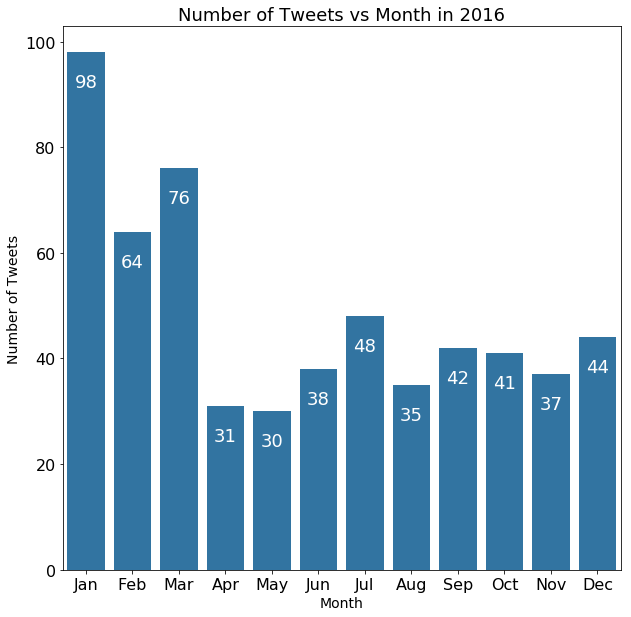

In [110]:
plt.figure(figsize=(10,10))
ax=sns.countplot(x=df2[df2['year']=='2016']["month"][::-1], data=df2, color='#1f77b4')

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=18)
    
plt.xlabel('Month',size=14)
plt.ylabel('Number of Tweets', size=14)
plt.title('Number of Tweets vs Month in 2016'.format(col.capitalize()), size=18)
plt.yticks(size=16)
plt.xticks(size=16)

plt.show()